In [1]:
import sympy as sp

In [2]:
w1, w2, W, t = sp.symbols('omega1, omega2, Omega, t', real=True)
u1, v1, u2, v2 = sp.symbols('u1, v1, u2, v2')
du1, dv1, du2, dv2 = sp.symbols('du1, dv1, du2, dv2')

In [3]:
r   =       u1 * sp.cos(W*t) -      v1 * sp.sin(W*t)
dr  = -W *  u1 * sp.sin(W*t) - W *  v1 * sp.cos(W*t)
d2r = -W * du1 * sp.sin(W*t) - W * dv1 * sp.cos(W*t) - W**2 * r

In [4]:
s   =         u2 * sp.cos(W/2*t) -        v2 * sp.sin(W/2*t)
ds  = -W/2 *  u2 * sp.sin(W/2*t) - W/2 *  v2 * sp.cos(W/2*t)
d2s = -W/2 * du2 * sp.sin(W/2*t) - W/2 * dv2 * sp.cos(W/2*t) - W**2/4 * r

In [5]:
eq1l = d2r + w1**2 * r
eq2l = d2s + w2**2 * s

In [22]:
eq1l1 = eq1l.expand().subs(w1,1)
eq2l1 = eq2l.expand().subs(w2,1/2)

In [23]:
eq1l1

In [24]:
eq2l1

In [29]:
sp.integrate((eq1l1*sp.cos(W*t)+eq2l1*sp.sin(W*t)).expand(),(t,0,2*sp.pi/W*2))

In [6]:
eq1r = ds - w2**2 - w2**2/2 * s**2 + sp.cos(W*t)
eq2r = -2 * dr * ds

In [7]:
eq2r

In [8]:
eq1r

In [45]:
(dr*ds).expand()

In [30]:
import sympy as sp

In [36]:
t, c1, c2 = sp.symbols('t, c1, c2', real=True)

In [37]:
x = 1/4 * sp.cos(t) * sp.cos(2*t) + t/2 * sp.sin(t) + 1/4 * sp.sin(t) * sp.sin(2*t) + c1 * sp.cos(t) + c2 * sp.sin(t)

In [38]:
(sp.diff(x,t,t)+x).expand().simplify()

In [42]:
(1/4 * sp.cos(t) * sp.cos(2*t)+1/4 * sp.sin(t) * sp.sin(2*t)).simplify()

In [43]:
x.simplify()

In [48]:
ex2 = t/2 * sp.sin(t)

In [49]:
sp.diff(ex2,t,t)+ex2

In [2]:
import numpy as np
from scipy.integrate import  odeint
import matplotlib.pyplot as plt

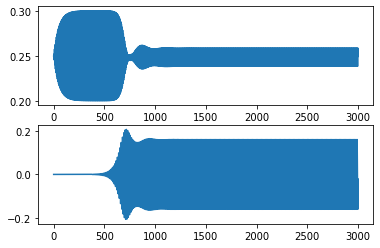

In [8]:
def eqs(z, t):
    r, th, dr, dth = z
    # added dumping to get finite ampl.
    # solutiion dows not depend on ampl. of source
    return [
        dr,
        dth,
        -0.04 * dr -r -0*dth + 1/4 * np.cos(th) + 0.002*np.cos(t),
        -0.01 * dth - 1/4 * np.sin(th) - 2*dr*dth
    ]

Tmax = 3000
t = np.linspace(0,Tmax,int(20*Tmax))
sol = odeint(eqs, [0.25,1e-6,0,0], t)

plt.subplot(2,1,1)
plt.plot(t,sol[:,0])
plt.subplot(2,1,2)
plt.plot(t,sol[:,1])
plt.show()